In [6]:
#import pandas library
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
#import mysql connector python library
pip install mysql-connector-python

In [10]:
#import matplotlib library
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
#import seaborn library
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [14]:
#connect with database
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "chirag37",
                            database = "ecommerce")

cur = db.cursor()

# list all unique cities where where customers are located.


In [16]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# count the number of orders placed in 2017.

In [28]:
query=""" select count(order_id) from orders where year(order_purchase_timestamp)=2017"""
cur.execute(query)
data=cur.fetchall()
print("Total orders are placed in 2017 :",data[0][0]) 

Total orders are placed in 2017 : 45101


# find the total sales per category

In [30]:
query = """ select upper(products.product_category) as category, 
round(sum(payments.payment_value),2) as sales
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category
"""
cur.execute(query)
data= cur.fetchall()
df=pd.DataFrame(data)
df

,0,1
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# calculate the percentage of orders that were paid in installment

In [38]:
query = """ select ((sum(case when payment_installments >= 1 then 1
else 0 end))/count(*))*100 from payments
"""
cur.execute(query)
data=cur.fetchall()
print("the percentage of orders that were paid in installments is ",data[0][0])

the percentage of orders that were paid in installments is  99.9981


# count the number of customers from each states

In [64]:
query=""" select customer_state,count(customer_id) from customers group by customer_state"""
cur.execute(query)
data=cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count" ])
df

,state,customer_count
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,GO,2020
8,ES,2033
9,BA,3380


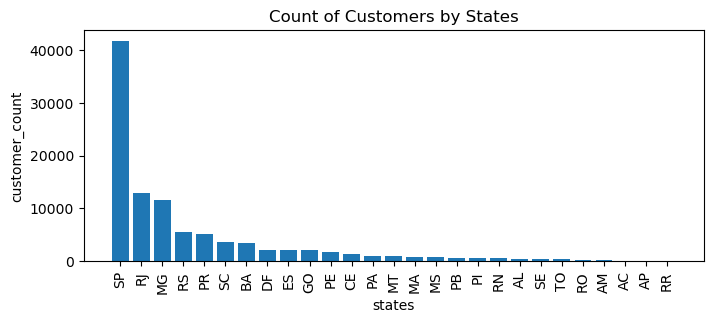

In [48]:


plt.figure(figsize = (8,3))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by States")
plt.show()

# calculate the number of orders per month in 2018

In [74]:
query=""" select monthname(order_purchase_timestamp) as months, count(order_id) as order_count 
from orders where year(order_purchase_timestamp)=2018 group by months"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["months","order_count"])
df



,months,order_count
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211
5,January,7269
6,May,6873
7,April,6939
8,September,16
9,October,4


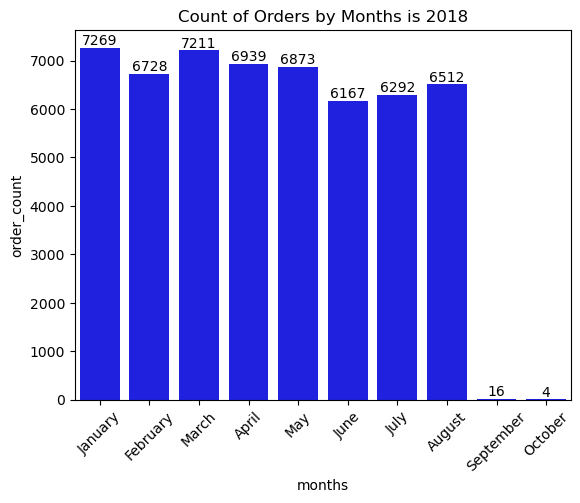

In [80]:
month = ["January", "February","March","April","May","June","July","August","September","October"]

ax = sns.barplot(x = df["months"],y =  df["order_count"], data = df, order = month, color = "blue")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months is 2018")

plt.show()

# find the average number of products per order, grouped by customer city

In [90]:
query="""with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""
cur.execute(query)
data= cur.fetchall()
df=pd.DataFrame(data,columns=["customer city", "average products/ order"])
df

,customer city,average products/ order
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
...,...,...
4105,lagoa da canoa,1.00
4106,japaratuba,1.00
4107,sebastiao leal,1.00
4108,morro agudo de goias,1.00


# calculate the percentage the total revenue contributed by each product category

In [92]:
query="""select upper(products.product_category) as category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) as sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["category","percentage distribution"])
df


,category,percentage distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


In [ ]:
# identify the cor-relation between product price and the number of times the product has been purchased

In [98]:
pip install numpy

In [100]:
import numpy as np
query="""select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])


the correlation is -0.10631514167157562


In [ ]:
# Calculate the total revenue generated by the each seller and rank them by revenue

In [113]:
query=""" select *, dense_rank() over(order by revenue desc) as rn from ( select order_items.seller_id,sum(payments.payment_value) as revenue
from order_items join payments on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["seller_id","revenue","rank"])
df

,seller_id,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.907302,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,2
2,4a3ca9315b744ce9f8e9374361493884,301245.269765,3
3,1f50f920176fa81dab994f9023523100,290253.420128,4
4,53243585a1d6dc2643021fd1853d8905,284903.080498,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.209999,3082
3091,702835e4b785b67a084280efca355756,18.559999,3083
3092,4965a7002cca77301c82d3f91b82e1a9,16.360001,3084
3093,77128dec4bec4878c37ab7d6169d6f26,15.220000,3085


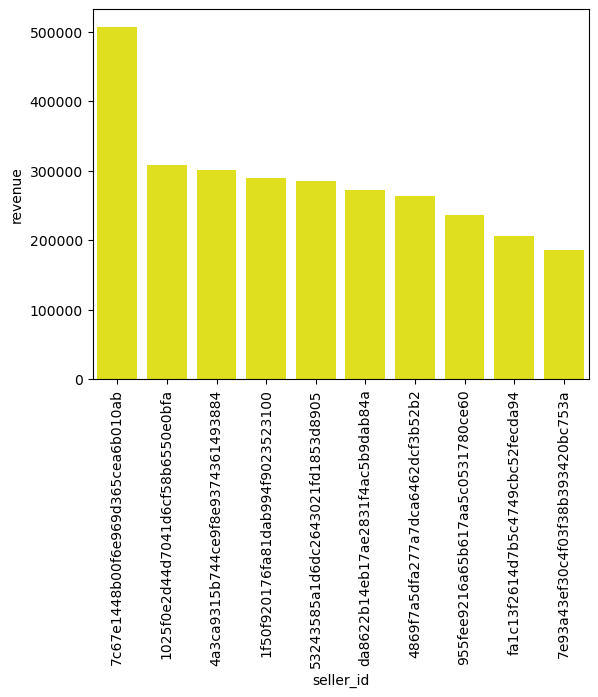

In [123]:
df=df.head(10)
sns.barplot(x="seller_id",y="revenue",data=df,color="yellow")
plt.xticks(rotation = 90)
plt.show()

# calculate the moving average  of the order value of each customer over their order id history

In [129]:
query="""select customer_id,order_purchase_timestamp,payment,avg(payment)
over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row ) as mov_avg from(
select o.customer_id,o.order_purchase_timestamp,p.payment_value as payment from payments as p join orders as o on p.order_id=o.order_id) as a"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# calculate the cumutative sales per month for each year

In [137]:
query=""" select years,months, payment,sum(payment)over(partition by years,months) as cumutative_sales 
from (select year(o.order_purchase_timestamp) as years, month(o.order_purchase_timestamp) as months, round(sum(p.payment_value),2) as payment
from orders as o join payments as p on o.order_id=p.order_id group by  years, months order by years, months) as a"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["years","months","payment","sum of payment"])
df

,years,months,payment,sum of payment
0,2016,9,252.24,252.24
1,2016,10,59090.48,59090.48
2,2016,12,19.62,19.62
3,2017,1,138488.04,138488.04
4,2017,2,291908.01,291908.01
5,2017,3,449863.60,449863.60
6,2017,4,417788.03,417788.03
7,2017,5,592918.82,592918.82
8,2017,6,511276.38,511276.38
9,2017,7,592382.92,592382.92


# calculate the year over year growth rate of total sales.

In [143]:
query= """with a as(select year(o.order_purchase_timestamp) as years,
round(sum(p.payment_value),2) as payment from orders as o join payments as p
on o.order_id = p.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [145]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

# Identify the top 3 customers who spent the most money in each year.

In [147]:
query="""select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
df

,years,id,payment,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3


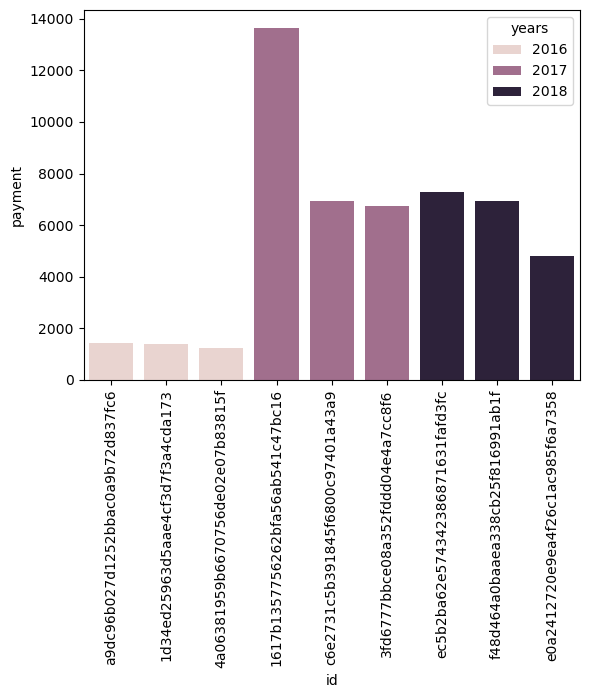

In [149]:
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()